In [1]:
import os
import re
import cv2
import time
import shutil
import zipfile
import urllib.request
import numpy as np
from shutil import rmtree
from PIL import Image
from os import listdir
from os.path import isfile, join
from random import randrange
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
# download soil_photos.zip
file = 'soil_photos.zip'
url = 'http://apmonitor.com/pds/uploads/Main/'+file
urllib.request.urlretrieve(url, file)

('soil_photos.zip', <http.client.HTTPMessage at 0x7f8140d50280>)

In [3]:
# extract archive soil_photos.zip
with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall('./')

In [4]:
#rmtree("train") #Carpeta
os.remove("soil_photos.zip") #Archivos

In [5]:
training_data_directory = 'train'
test_data_directory = 'test'

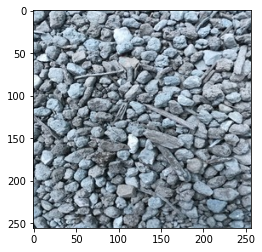

In [6]:
percentage_photo= training_data_directory + r'/Gravel/1.jpg'
im = cv2.imread(percentage_photo) 
plt.imshow(im)

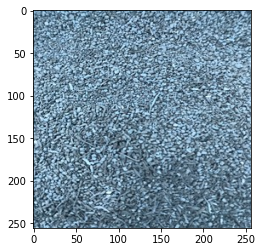

In [7]:
percentage_photo= test_data_directory + r'/Sand/1.jpg'
im = cv2.imread(percentage_photo) 
plt.imshow(im)

In [8]:
# Initiate data processing tools
training_data_processor = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.2,
    rotation_range = 10,
    shear_range = 0.2,
    height_shift_range = 0.1,
    width_shift_range = 0.1
)

test_data_processor = ImageDataGenerator(rescale = 1./255)

# Load data into Python
training_data = training_data_processor.flow_from_directory(
    training_data_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
)

testing_data = test_data_processor.flow_from_directory(
    test_data_directory,
    target_size = (256 ,256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 75 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [10]:
# choose model parameters
num_conv_layers = 2
num_dense_layers = 1
layer_size = 32
num_training_epochs = 20
MODEL_NAME = 'soil_classifier'